# Cleaning FIFA data

In [536]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [537]:
#Load data
df_FIFA = pd.read_csv('Datasets/FIFA Data.csv')

In [538]:
df_FIFA

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [539]:
##Clean home team data##
df_home_teams = df_FIFA[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 
                         'home_team_result']].copy()
#Rename columns
df_home_teams = df_home_teams.rename(columns = {'home_team':'team', 'away_team':'opponent', 
                                                'home_team_fifa_rank':'team_fifa_rank',
                                'away_team_fifa_rank':'opponent_fifa_rank', 'home_team_result':'result'})
#Make result column long
df_home_teams['Win'] = df_home_teams.apply(lambda row: 1 if row['result'] == 'Win' else 0, axis = 1)
df_home_teams['Lose'] = df_home_teams.apply(lambda row: 1 if row['result'] =='Lose' else 0, axis = 1)
df_home_teams['Draw'] = df_home_teams.apply(lambda row: 1 if row['result'] == 'Draw' else 0, axis = 1)

##Clean away team data##
df_away_teams = df_FIFA[['date','away_team', 'home_team', 'away_team_fifa_rank', 'home_team_fifa_rank', 
                         'home_team_result']].copy()
#Change away team result to correct value (opposite of home team result)
def convert_home_result(row):
    if row['home_team_result'] == 'Win':
        return 'Lose'
    if row['home_team_result'] == 'Lose':
        return 'Win'
    else:
        return 'Draw' 
df_away_teams['away_team_result'] = df_away_teams.apply(lambda row: convert_home_result(row), axis = 1)
#Rename columns
df_away_teams = df_away_teams.rename(columns = {'away_team':'team', 'home_team':'opponent', 
                                                'away_team_fifa_rank':'team_fifa_rank',
                                'home_team_fifa_rank':'opponent_fifa_rank', 'away_team_result':'result'})
#Elongate result column
df_away_teams['Win'] = df_away_teams.apply(lambda row: 1 if row['result'] == 'Win' else 0, axis = 1)
df_away_teams['Lose'] = df_away_teams.apply(lambda row: 1 if row['result'] =='Lose' else 0, axis = 1)
df_away_teams['Draw'] = df_away_teams.apply(lambda row: 1 if row['result'] == 'Draw' else 0, axis = 1)
df_away_teams = df_away_teams[['date', 'team', 'opponent', 'team_fifa_rank', 'opponent_fifa_rank', 'result', 
                               'Win', 'Lose', 'Draw']]

#Put data back together
df_team_matches = df_home_teams.append(df_away_teams, ignore_index=True)
df_team_matches.sort_values(by=['date'])

#Add year column
df_team_matches['year'] = df_team_matches['date'].str[:4]
df_team_matches


/var/folders/ds/05rmyybs0w50jbp22_vvnmmr0000gn/T/ipykernel_3806/195656777.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_team_matches = df_home_teams.append(df_away_teams, ignore_index=True)


,date,team,opponent,team_fifa_rank,opponent_fifa_rank,result,Win,Lose,Draw,year
0,1993-08-08,Bolivia,Uruguay,59,22,Win,1,0,0,1993
1,1993-08-08,Brazil,Mexico,8,14,Draw,0,0,1,1993
2,1993-08-08,Ecuador,Venezuela,35,94,Win,1,0,0,1993
3,1993-08-08,Guinea,Sierra Leone,65,86,Win,1,0,0,1993
4,1993-08-08,Paraguay,Argentina,67,5,Lose,0,1,0,1993
...,...,...,...,...,...,...,...,...,...,...
47837,2022-06-14,Andorra,Moldova,153,180,Lose,0,1,0,2022
47838,2022-06-14,Latvia,Liechtenstein,135,192,Win,1,0,0,2022
47839,2022-06-14,Ghana,Chile,60,28,Win,1,0,0,2022
47840,2022-06-14,Tunisia,Japan,35,23,Win,1,0,0,2022


In [540]:
#Sum team data by year
df_team_annual_totals = df_team_matches.groupby(['team', 'year']).sum()
df_team_annual_totals.reset_index(inplace=True)
#Drop 2021 and 2022 data (to fit democracy dataset)
df_team_annual_totals = df_team_annual_totals[df_team_annual_totals["year"].str.contains("2021")==False]
df_team_annual_totals = df_team_annual_totals[df_team_annual_totals["year"].str.contains("2022")==False]
#Add total points per year column
df_team_annual_totals['Points'] = df_team_annual_totals['Win']*3 + df_team_annual_totals['Draw']

df_team_annual_totals

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points
0,Afghanistan,2003,802,581,1,3,0,3
1,Afghanistan,2005,793,602,1,3,0,3
2,Afghanistan,2006,378,348,0,0,2,2
3,Afghanistan,2007,381,249,0,2,0,0
4,Afghanistan,2008,1845,1655,1,5,4,7
...,...,...,...,...,...,...,...,...
5361,Zimbabwe,2016,1363,1172,5,2,5,20
5362,Zimbabwe,2017,1617,1574,7,4,4,25
5363,Zimbabwe,2018,788,817,3,3,1,10
5364,Zimbabwe,2019,1907,2031,8,4,5,29


In [541]:
#Take annual averages by team
df_team_annual_avg = df_team_matches.groupby(['team', 'year']).mean()
df_team_annual_avg.reset_index(inplace=True)
#Drop 2022 and 2021
df_team_annual_avg = df_team_annual_avg[df_team_annual_avg["year"].str.contains("2021")==False]
df_team_annual_avg = df_team_annual_avg[df_team_annual_avg["year"].str.contains("2022")==False]
df_team_annual_avg = df_team_annual_avg.rename(columns = {'team_fifa_rank':'team_avg_fifa_rank', 
                                                          'home_team':'opponent', 
                                                          'opponent_fifa_rank':'opponent_avg_fifa_rank',
                                                          'Win':'team_avg_win', 
                                                          'Lose':'team_avg_lose',
                                                         'Draw':'team_avg_draw'})
df_team_annual_avg

,team,year,team_avg_fifa_rank,opponent_avg_fifa_rank,team_avg_win,team_avg_lose,team_avg_draw
0,Afghanistan,2003,200.500000,145.250000,0.250000,0.750000,0.000000
1,Afghanistan,2005,198.250000,150.500000,0.250000,0.750000,0.000000
2,Afghanistan,2006,189.000000,174.000000,0.000000,0.000000,1.000000
3,Afghanistan,2007,190.500000,124.500000,0.000000,1.000000,0.000000
4,Afghanistan,2008,184.500000,165.500000,0.100000,0.500000,0.400000
...,...,...,...,...,...,...,...
5361,Zimbabwe,2016,113.583333,97.666667,0.416667,0.166667,0.416667
5362,Zimbabwe,2017,107.800000,104.933333,0.466667,0.266667,0.266667
5363,Zimbabwe,2018,112.571429,116.714286,0.428571,0.428571,0.142857
5364,Zimbabwe,2019,112.176471,119.470588,0.470588,0.235294,0.294118


In [542]:
#Combine annual team data
df_team_annual_totals = df_team_annual_totals.merge(df_team_annual_avg, on=['team','year'])
df_team_annual_totals

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points,team_avg_fifa_rank,opponent_avg_fifa_rank,team_avg_win,team_avg_lose,team_avg_draw
0,Afghanistan,2003,802,581,1,3,0,3,200.500000,145.250000,0.250000,0.750000,0.000000
1,Afghanistan,2005,793,602,1,3,0,3,198.250000,150.500000,0.250000,0.750000,0.000000
2,Afghanistan,2006,378,348,0,0,2,2,189.000000,174.000000,0.000000,0.000000,1.000000
3,Afghanistan,2007,381,249,0,2,0,0,190.500000,124.500000,0.000000,1.000000,0.000000
4,Afghanistan,2008,1845,1655,1,5,4,7,184.500000,165.500000,0.100000,0.500000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Zimbabwe,2016,1363,1172,5,2,5,20,113.583333,97.666667,0.416667,0.166667,0.416667
4974,Zimbabwe,2017,1617,1574,7,4,4,25,107.800000,104.933333,0.466667,0.266667,0.266667
4975,Zimbabwe,2018,788,817,3,3,1,10,112.571429,116.714286,0.428571,0.428571,0.142857
4976,Zimbabwe,2019,1907,2031,8,4,5,29,112.176471,119.470588,0.470588,0.235294,0.294118


# Joining team matches data with political and economic indicators

In [543]:
#Joining team matches data with GINI data
df_GINI = pd.read_csv('Datasets/Income Inequality Data/gini.csv')

#Filter GINI dataset for years in FIFA timefame
df_GINI = df_GINI[['country', '1994', '1995', '1996', '1997', '1998', '1999', '2001',
                   '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                   '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018',
                   '2019', '2020']]
#Melt GINI data to convert year columns to rows
df_GINI = df_GINI.melt(id_vars = ['country'], var_name='Year', value_name='GINI coefficient')

df_team_GINI = df_team_annual_totals.merge(df_GINI, how='left', left_on=['team','year'], 
                                           right_on=['country','Year'])
df_team_GINI[df_team_GINI['country'].isna() == True]
#We see that certain countries exist in the GINI dataframe under different names

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points,team_avg_fifa_rank,opponent_avg_fifa_rank,team_avg_win,team_avg_lose,team_avg_draw,country,Year,GINI coefficient
15,Albania,1993,184,23,0,2,0,0,92.000000,11.500000,0.000000,1.000000,0.000000,NaN,NaN,NaN
22,Albania,2000,686,699,5,2,1,16,85.750000,87.375000,0.625000,0.250000,0.125000,NaN,NaN,NaN
43,Algeria,1993,30,18,0,0,1,1,30.000000,18.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50,Algeria,2000,1373,1165,5,5,7,22,80.764706,68.529412,0.294118,0.294118,0.411765,NaN,NaN,NaN
71,American Samoa,2000,202,185,0,1,0,0,202.000000,185.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,Yemen,2000,790,591,1,4,0,3,158.000000,118.200000,0.200000,0.800000,0.000000,NaN,NaN,NaN
4922,Zambia,1993,54,89,1,1,0,3,27.000000,44.500000,0.500000,0.500000,0.000000,NaN,NaN,NaN
4929,Zambia,2000,736,2160,7,7,5,26,38.736842,113.684211,0.368421,0.368421,0.263158,NaN,NaN,NaN
4950,Zimbabwe,1993,244,345,4,1,0,12,48.800000,69.000000,0.800000,0.200000,0.000000,NaN,NaN,NaN


In [544]:
#Revise key country names
df_GINI.loc[df_GINI['country'] == 'China', 'country'] = 'China PR'
df_GINI.loc[df_GINI['country'] == 'United Kingdom', 'country'] = 'England'
df_GINI.loc[df_GINI['country'] == 'United States', 'country'] = 'USA'

#Join GINI data with team annual data
df_team_GINI = df_team_annual_totals.merge(df_GINI, how='left', left_on=['team','year'], 
                                           right_on=['country','Year'])
df_team_GINI

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points,team_avg_fifa_rank,opponent_avg_fifa_rank,team_avg_win,team_avg_lose,team_avg_draw,country,Year,GINI coefficient
0,Afghanistan,2003,802,581,1,3,0,3,200.500000,145.250000,0.250000,0.750000,0.000000,Afghanistan,2003,36.8
1,Afghanistan,2005,793,602,1,3,0,3,198.250000,150.500000,0.250000,0.750000,0.000000,Afghanistan,2005,36.8
2,Afghanistan,2006,378,348,0,0,2,2,189.000000,174.000000,0.000000,0.000000,1.000000,Afghanistan,2006,36.8
3,Afghanistan,2007,381,249,0,2,0,0,190.500000,124.500000,0.000000,1.000000,0.000000,Afghanistan,2007,36.8
4,Afghanistan,2008,1845,1655,1,5,4,7,184.500000,165.500000,0.100000,0.500000,0.400000,Afghanistan,2008,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Zimbabwe,2016,1363,1172,5,2,5,20,113.583333,97.666667,0.416667,0.166667,0.416667,Zimbabwe,2016,43.2
4974,Zimbabwe,2017,1617,1574,7,4,4,25,107.800000,104.933333,0.466667,0.266667,0.266667,Zimbabwe,2017,43.2
4975,Zimbabwe,2018,788,817,3,3,1,10,112.571429,116.714286,0.428571,0.428571,0.142857,Zimbabwe,2018,43.2
4976,Zimbabwe,2019,1907,2031,8,4,5,29,112.176471,119.470588,0.470588,0.235294,0.294118,Zimbabwe,2019,43.2


In [545]:
#Joining team annual data with democracy data
df_DEMOCRACY = pd.read_csv('Datasets/Democracy Data/GSoDI_v5.1.csv')
#Change date objects to strings
df_DEMOCRACY['ID_year'] = df_DEMOCRACY['ID_year'].apply(str)
#Join democracy data with FIFA team data
df_team_DEMOCRACY = df_team_annual_totals.merge(df_DEMOCRACY, how='left', left_on=['team', 'year'], 
                                                right_on=['ID_country_name', 'ID_year'])
#Analyze missing countries from democracy data
#df_team_DEMOCRACY[df_team_DEMOCRACY['ID_country_name'].isna() == True].groupby('team').sum().head(50)

/var/folders/ds/05rmyybs0w50jbp22_vvnmmr0000gn/T/ipykernel_3806/1252961562.py:2: DtypeWarning: Columns (200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DEMOCRACY = pd.read_csv('Datasets/Democracy Data/GSoDI_v5.1.csv')


In [546]:
#Revise country names in democracy dataset
df_DEMOCRACY.loc[df_DEMOCRACY['ID_country_name'] == 'China', 'ID_country_name'] = 'China PR'
df_DEMOCRACY.loc[df_DEMOCRACY['ID_country_name'] == 'United Kingdom', 'ID_country_name'] = 'England'
df_DEMOCRACY.loc[df_DEMOCRACY['ID_country_name'] == 'United States', 'ID_country_name'] = 'USA'

#Rejoin democracy data with FIFA team data
df_team_DEMOCRACY = df_team_annual_totals.merge(df_DEMOCRACY, how='left', left_on=['team', 'year'], 
                                                right_on=['ID_country_name', 'ID_year'])
df_team_DEMOCRACY

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points,team_avg_fifa_rank,opponent_avg_fifa_rank,...,v_51_05,v_51_06,v_52_01,v_53_01,v_53_02,v_54_01,v_54_02,regime_status_name,democratic_performance_name,democratic_performance_numeric
0,Afghanistan,2003,802,581,1,3,0,3,200.500000,145.250000,...,0.434526,0.412148,NaN,0.000000,0.000000,0.015060,0.410928,Authoritarian Regime,Authoritarian Regime,5.0
1,Afghanistan,2005,793,602,1,3,0,3,198.250000,150.500000,...,0.434526,0.412148,0.5171,0.025608,0.000000,0.023092,0.410928,Authoritarian Regime,Authoritarian Regime,5.0
2,Afghanistan,2006,378,348,0,0,2,2,189.000000,174.000000,...,0.434526,0.412148,0.5171,0.025608,0.666667,0.023092,0.410928,Hybrid Regime,Hybrid Regime,4.0
3,Afghanistan,2007,381,249,0,2,0,0,190.500000,124.500000,...,0.434526,0.412148,0.5171,0.025608,0.666667,0.023092,0.410928,Hybrid Regime,Hybrid Regime,4.0
4,Afghanistan,2008,1845,1655,1,5,4,7,184.500000,165.500000,...,0.434526,0.412148,0.5171,0.025608,0.666667,0.023092,0.410928,Hybrid Regime,Hybrid Regime,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Zimbabwe,2016,1363,1172,5,2,5,20,113.583333,97.666667,...,0.767185,0.585528,0.6109,0.256082,0.666667,0.835341,0.276347,Hybrid Regime,Hybrid Regime,4.0
4974,Zimbabwe,2017,1617,1574,7,4,4,25,107.800000,104.933333,...,0.767185,0.585528,0.6109,0.256082,0.666667,0.888554,0.276347,Hybrid Regime,Hybrid Regime,4.0
4975,Zimbabwe,2018,788,817,3,3,1,10,112.571429,116.714286,...,0.767185,0.585528,0.6340,0.240717,0.666667,0.903614,0.340719,Authoritarian Regime,Authoritarian Regime,5.0
4976,Zimbabwe,2019,1907,2031,8,4,5,29,112.176471,119.470588,...,0.767185,0.585528,0.6340,0.225352,0.666667,0.892570,0.308084,Authoritarian Regime,Authoritarian Regime,5.0


In [547]:
#Joining team annual data with GDP data
df_GDP = pd.read_csv('Datasets/GDP Data/gdp_1960_2020.csv')
df_GDP
#Revise country names
df_GDP.loc[df_GDP['country'] == 'China', 'country'] = 'China PR'
df_GDP.loc[df_GDP['country'] == 'United Kingdom', 'country'] = 'England'
df_GDP.loc[df_GDP['country'] == 'the United States', 'country'] = 'USA'
#Change year datatypes
df_GDP['year'] = df_GDP['year'].apply(str)
#Remove duplicates
df_GDP = df_GDP.drop_duplicates(
  subset = ['country', 'year'],
  keep = 'first').reset_index(drop = True)
#Joining team annual data with GDP data
df_team_GDP = df_team_annual_totals.merge(df_GDP, how='left', left_on=['team', 'year'], 
                                          right_on=['country', 'year'])
df_team_GDP

#Analyze missing countries from GDP data
#df_team_GDP[df_team_GDP['country'].isna() == True].groupby('team').sum().head(50)

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points,team_avg_fifa_rank,opponent_avg_fifa_rank,team_avg_win,team_avg_lose,team_avg_draw,rank,country,state,gdp,gdp_percent
0,Afghanistan,2003,802,581,1,3,0,3,200.500000,145.250000,0.250000,0.750000,0.000000,131.0,Afghanistan,Asia,4.515559e+09,0.000117
1,Afghanistan,2005,793,602,1,3,0,3,198.250000,150.500000,0.250000,0.750000,0.000000,132.0,Afghanistan,Asia,6.209138e+09,0.000132
2,Afghanistan,2006,378,348,0,0,2,2,189.000000,174.000000,0.000000,0.000000,1.000000,129.0,Afghanistan,Asia,6.971286e+09,0.000137
3,Afghanistan,2007,381,249,0,2,0,0,190.500000,124.500000,0.000000,1.000000,0.000000,123.0,Afghanistan,Asia,9.747880e+09,0.000169
4,Afghanistan,2008,1845,1655,1,5,4,7,184.500000,165.500000,0.100000,0.500000,0.400000,129.0,Afghanistan,Asia,1.010923e+10,0.000160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Zimbabwe,2016,1363,1172,5,2,5,20,113.583333,97.666667,0.416667,0.166667,0.416667,111.0,Zimbabwe,Africa,2.054868e+10,0.000273
4974,Zimbabwe,2017,1617,1574,7,4,4,25,107.800000,104.933333,0.466667,0.266667,0.266667,113.0,Zimbabwe,Africa,1.901533e+10,0.000237
4975,Zimbabwe,2018,788,817,3,3,1,10,112.571429,116.714286,0.428571,0.428571,0.142857,114.0,Zimbabwe,Africa,1.952362e+10,0.000229
4976,Zimbabwe,2019,1907,2031,8,4,5,29,112.176471,119.470588,0.470588,0.235294,0.294118,120.0,Zimbabwe,Africa,1.693243e+10,0.000196


In [548]:
#Joining team data with median population age data
df_AGE = pd.read_csv('Datasets/Age Data/MedianAge.csv')
#Add columns for missing years (we will use linear interpolation to fill in values)
for year in range (1993,2021):
    if year % 5 != 0:
        df_AGE[str(year)] = np.nan
#Sort year columns
df_AGE = df_AGE.reindex(sorted(df_AGE.columns), axis=1)
#Convert values to integers
df_AGE[['1993', '1994', '1995','1996', '1997', '1998', '1999', '2001',
                   '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                   '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018',
                   '2019', '2020']] = df_AGE[['1993', '1994', '1995','1996', '1997', '1998', '1999', '2001',
                   '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                   '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018',
                   '2019', '2020']].apply(pd.to_numeric, errors='coerce', axis=1)
#Fill in values for missing years using linear interpolation
df_AGE[['1993', '1994', '1995','1996', '1997', '1998', '1999', '2001',
                   '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                   '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018',
                   '2019', '2020']] = df_AGE[['1993', '1994', '1995','1996', '1997', '1998', '1999', '2001',
                   '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                   '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018',
                   '2019', '2020']].interpolate(method ='linear', 
                                                limit_direction = 'backward',axis = 1)
#Melt age data to convert year columns to rows
df_AGE = df_AGE.melt(id_vars = ['Country'], var_name='Year', value_name='Median Age')
#Revise country names in age dataset
df_AGE.loc[df_AGE['Country'] == 'China', 'Country'] = 'China PR'
df_AGE.loc[df_AGE['Country'] == 'United Kingdom', 'Country'] = 'England'
df_AGE.loc[df_AGE['Country'] == 'United States', 'Country'] = 'USA'
#Joining team annual data with median age data
df_team_AGE = df_team_annual_totals.merge(df_AGE, how='left', left_on=['team', 'year'], 
                                          right_on=['Country', 'Year'])
df_team_AGE

,team,year,team_fifa_rank,opponent_fifa_rank,Win,Lose,Draw,Points,team_avg_fifa_rank,opponent_avg_fifa_rank,team_avg_win,team_avg_lose,team_avg_draw,Country,Year,Median Age
0,Afghanistan,2003,802,581,1,3,0,3,200.500000,145.250000,0.250000,0.750000,0.000000,Afghanistan,2003,16.509778
1,Afghanistan,2005,793,602,1,3,0,3,198.250000,150.500000,0.250000,0.750000,0.000000,Afghanistan,2005,16.490000
2,Afghanistan,2006,378,348,0,0,2,2,189.000000,174.000000,0.000000,0.000000,1.000000,Afghanistan,2006,16.565600
3,Afghanistan,2007,381,249,0,2,0,0,190.500000,124.500000,0.000000,1.000000,0.000000,Afghanistan,2007,16.641200
4,Afghanistan,2008,1845,1655,1,5,4,7,184.500000,165.500000,0.100000,0.500000,0.400000,Afghanistan,2008,16.716800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Zimbabwe,2016,1363,1172,5,2,5,20,113.583333,97.666667,0.416667,0.166667,0.416667,Zimbabwe,2016,20.991200
4974,Zimbabwe,2017,1617,1574,7,4,4,25,107.800000,104.933333,0.466667,0.266667,0.266667,Zimbabwe,2017,21.279400
4975,Zimbabwe,2018,788,817,3,3,1,10,112.571429,116.714286,0.428571,0.428571,0.142857,Zimbabwe,2018,21.567600
4976,Zimbabwe,2019,1907,2031,8,4,5,29,112.176471,119.470588,0.470588,0.235294,0.294118,Zimbabwe,2019,21.855800


In [549]:
#Joining every dataset together
#df_team_merged = df_team_GINI.merge(df_team_GDP, how='left', on = ['team','year'])
#df_team_merged = df_team_merged.merge(df_team_DEMOCRACY, how='left', on = ['team','year'])
#df_team_merged = df_team_merged.merge(df_team_AGE, how='left', on = ['team','year'])

#Merge GINI and GDP with team annual data
df_team_GINI_GDP = df_team_GINI[['team','year', 'team_fifa_rank', 'opponent_fifa_rank', 
                                 'Points','Win', 'Lose','Draw', 'team_avg_fifa_rank', 
                                 'opponent_avg_fifa_rank', 'team_avg_win',
       'team_avg_lose', 'team_avg_draw','GINI coefficient']].merge(df_GDP, how='left', 
                                                                   left_on=['team', 'year'], 
                                                                   right_on=['country', 'year'])
#Merge Democracy ratings with GINI, GDP and team annual data
df_team_GINI_GDP_DEMOCRACY = df_team_GINI_GDP[['team', 'year', 'team_fifa_rank', 
                                               'opponent_fifa_rank', 'Points', 'Win', 'Lose',
       'Draw', 'team_avg_fifa_rank', 'opponent_avg_fifa_rank', 'team_avg_win',
       'team_avg_lose', 'team_avg_draw', 'GINI coefficient', 
                                               'gdp', 'gdp_percent']].merge(df_DEMOCRACY, 
                                                                            how='left', 
                                                                            left_on=['team', 'year'], 
                                                                            right_on=['ID_country_name', 
                                                                            'ID_year'])
#Merge Median Age with Democracy, GINI, GDP and team annual data
df_team_GINI_GDP_DEMOCRACY_AGE = df_team_GINI_GDP_DEMOCRACY[['team','year', 'team_fifa_rank', 
                                                             'opponent_fifa_rank', 'Points','Win', 'Lose',
                                                             'Draw', 'team_avg_fifa_rank', 'opponent_avg_fifa_rank', 
                                                             'team_avg_win','team_avg_lose', 'team_avg_draw', 'GINI coefficient',
                                                             'gdp','democratic_performance_name',
                                                             'democratic_performance_numeric']].merge(df_AGE, how='left', 
                                                                                                      left_on=['team', 'year'], 
                                                                                                      right_on=['Country', 'Year'])
#Select columns for final joined dataset
df_team_annual_final = df_team_GINI_GDP_DEMOCRACY_AGE[['team', 'year', 'Points', 'Win', 'Lose',
       'Draw', 'team_avg_fifa_rank', 'GINI coefficient', 'gdp',
       'democratic_performance_name', 'democratic_performance_numeric','Median Age']]

df_team_annual_final

#See countries where gdp is missing
#df_team_annual_final[df_team_annual_final['gdp'].isna() == True].groupby('team').sum().head(50)

#df_team_annual_final[['team','year','team_avg_fifa_rank','Points','Win','Lose','Draw','GINI coefficient',
           #           'gdp','democratic_performance_name','Median Age']]
    
    

,team,year,Points,Win,Lose,Draw,team_avg_fifa_rank,GINI coefficient,gdp,democratic_performance_name,democratic_performance_numeric,Median Age
0,Afghanistan,2003,3,1,3,0,200.500000,36.8,4.515559e+09,Authoritarian Regime,5.0,16.509778
1,Afghanistan,2005,3,1,3,0,198.250000,36.8,6.209138e+09,Authoritarian Regime,5.0,16.490000
2,Afghanistan,2006,2,0,0,2,189.000000,36.8,6.971286e+09,Hybrid Regime,4.0,16.565600
3,Afghanistan,2007,0,0,2,0,190.500000,36.8,9.747880e+09,Hybrid Regime,4.0,16.641200
4,Afghanistan,2008,7,1,5,4,184.500000,36.8,1.010923e+10,Hybrid Regime,4.0,16.716800
...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Zimbabwe,2016,20,5,2,5,113.583333,43.2,2.054868e+10,Hybrid Regime,4.0,20.991200
4974,Zimbabwe,2017,25,7,4,4,107.800000,43.2,1.901533e+10,Hybrid Regime,4.0,21.279400
4975,Zimbabwe,2018,10,3,3,1,112.571429,43.2,1.952362e+10,Authoritarian Regime,5.0,21.567600
4976,Zimbabwe,2019,29,8,4,5,112.176471,43.2,1.693243e+10,Authoritarian Regime,5.0,21.855800


# Visualizing data for team performance and political and economic indicators

count    4978.000000
mean       12.411008
std         9.902611
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        63.000000
Name: Points, dtype: float64


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


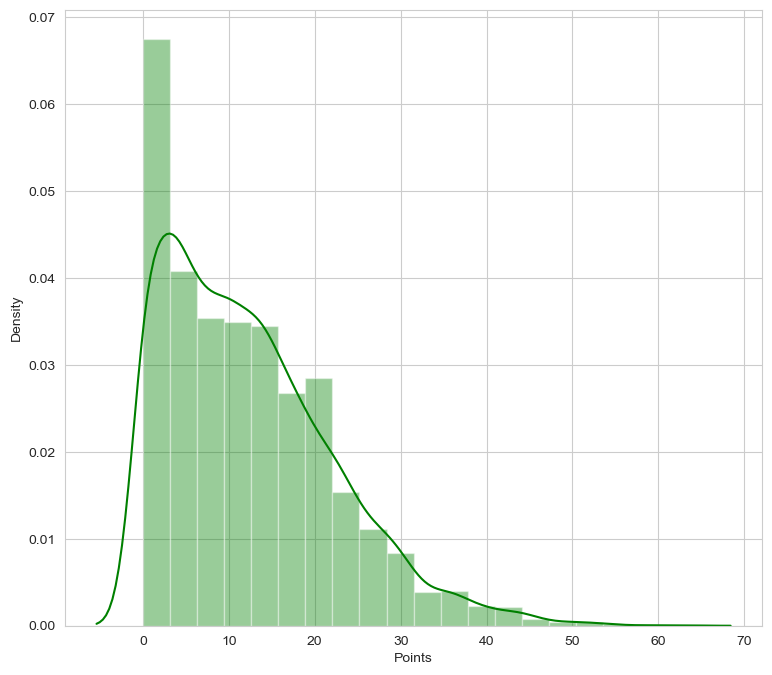

In [550]:
#Visualizing total annual points by team

print(df_team_annual_final['Points'].describe())
plt.figure(figsize=(9, 8))

sns.distplot(df_team_annual_final['Points'], color='g', bins=20, hist_kws={'alpha': 0.4});

array([[<AxesSubplot:title={'center':'Points'}>,
        <AxesSubplot:title={'center':'Win'}>,
        <AxesSubplot:title={'center':'Lose'}>],
       [<AxesSubplot:title={'center':'Draw'}>,
        <AxesSubplot:title={'center':'team_avg_fifa_rank'}>,
        <AxesSubplot:title={'center':'GINI coefficient'}>],
       [<AxesSubplot:title={'center':'gdp'}>,
        <AxesSubplot:title={'center':'democratic_performance_numeric'}>,
        <AxesSubplot:title={'center':'Median Age'}>]], dtype=object)

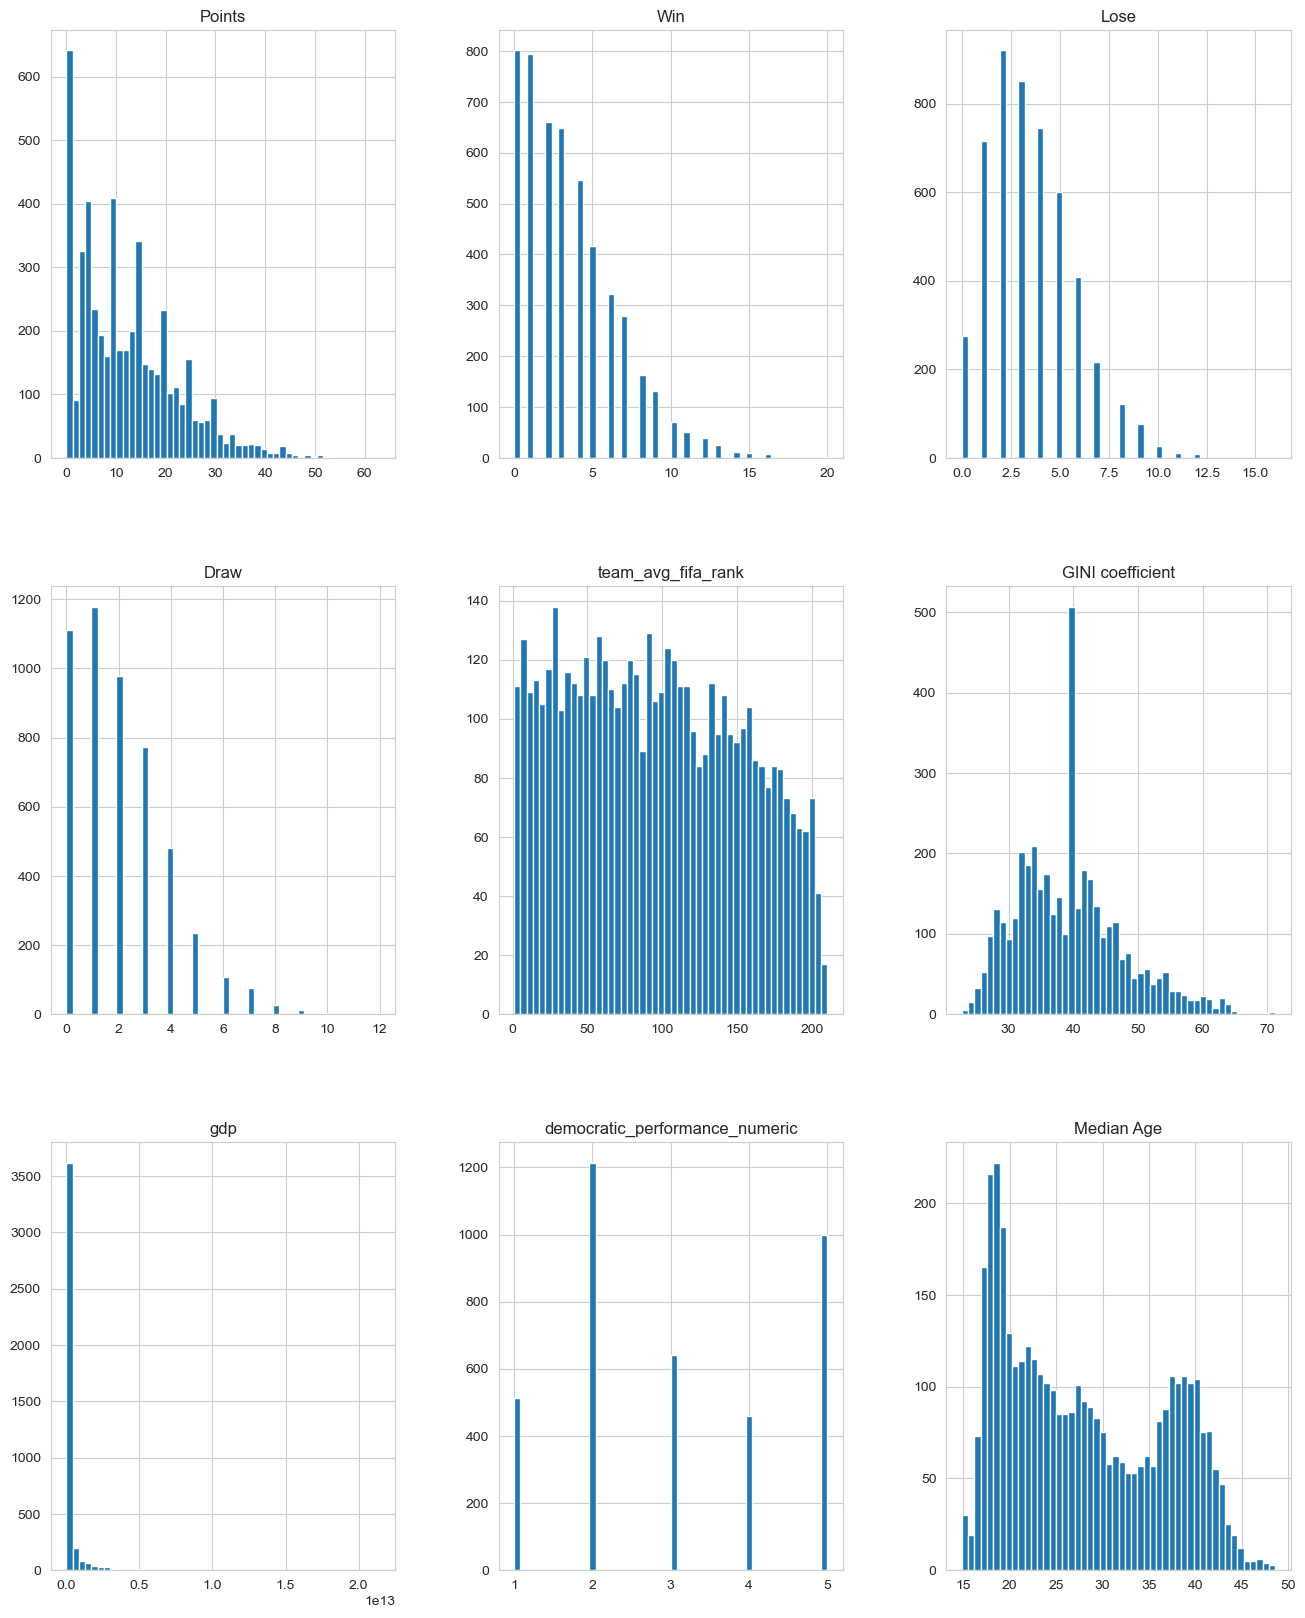

In [551]:
#Select numberical features
df_num = df_team_annual_final.select_dtypes(include = 'number')
df_num.hist(figsize=(16,20), bins=50)

# Correlation analysis

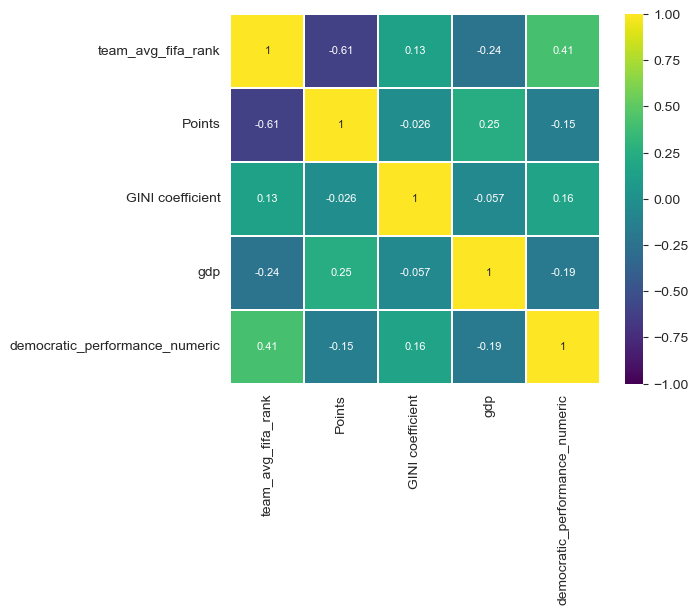

In [552]:
#Observe correlation between average team fifa rank and political/economic indicators
df_corr = df_team_annual_final[['team_avg_fifa_rank','Points','GINI coefficient','gdp','democratic_performance_numeric']].corr()
sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


## Correlation using average FIFA rank as performance indicator

In [553]:
feature_list = ['team_avg_fifa_rank','GINI coefficient','gdp','democratic_performance_numeric','Median Age']
df_corr = df_team_annual_final[feature_list].corr()['team_avg_fifa_rank']
golden_features_list = df_corr[abs(df_corr) != 0].sort_values(ascending=False)
print(golden_features_list)

team_avg_fifa_rank                1.000000
democratic_performance_numeric    0.408936
GINI coefficient                  0.134458
gdp                              -0.235441
Median Age                       -0.413003
Name: team_avg_fifa_rank, dtype: float64


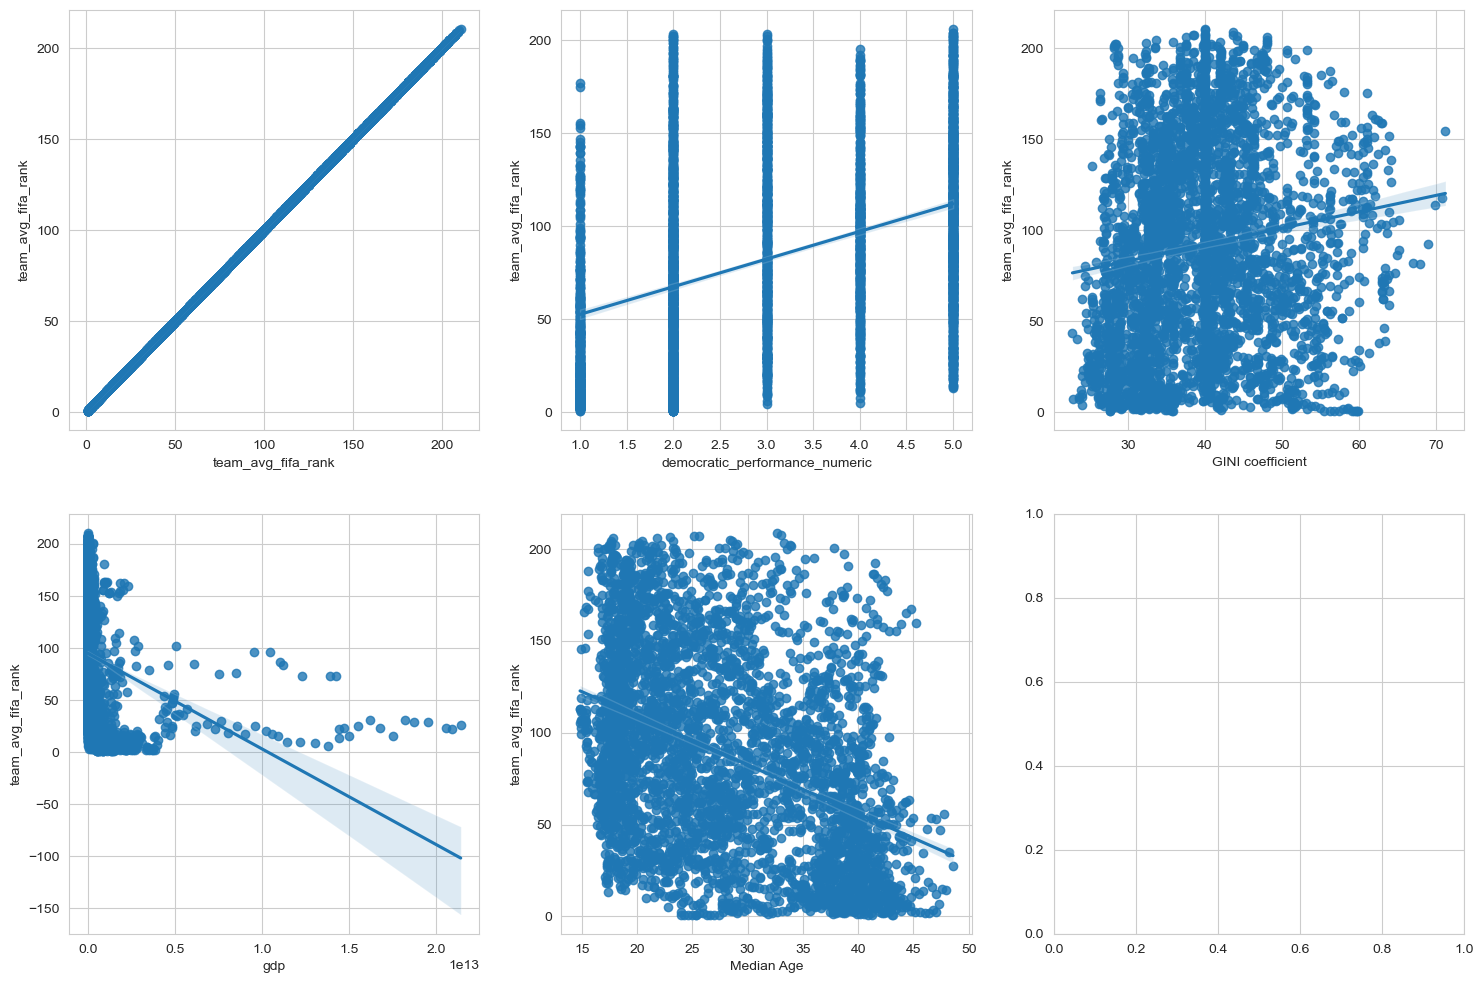

In [554]:
fig, ax = plt.subplots(round(len(golden_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list):
        sns.regplot(x=golden_features_list.index[i],y='team_avg_fifa_rank', 
                    data=df_team_annual_final, ax=ax)

## Correlation using points as performance indicator

In [555]:
feature_list = ['Points','GINI coefficient','gdp','democratic_performance_numeric','Median Age']
df_corr = df_team_annual_final[feature_list].corr()['Points'] 
golden_features_list = df_corr[abs(df_corr) != 0].sort_values(ascending=False)
print(golden_features_list)

Points                            1.000000
gdp                               0.248318
Median Age                        0.202753
GINI coefficient                 -0.026221
democratic_performance_numeric   -0.154073
Name: Points, dtype: float64


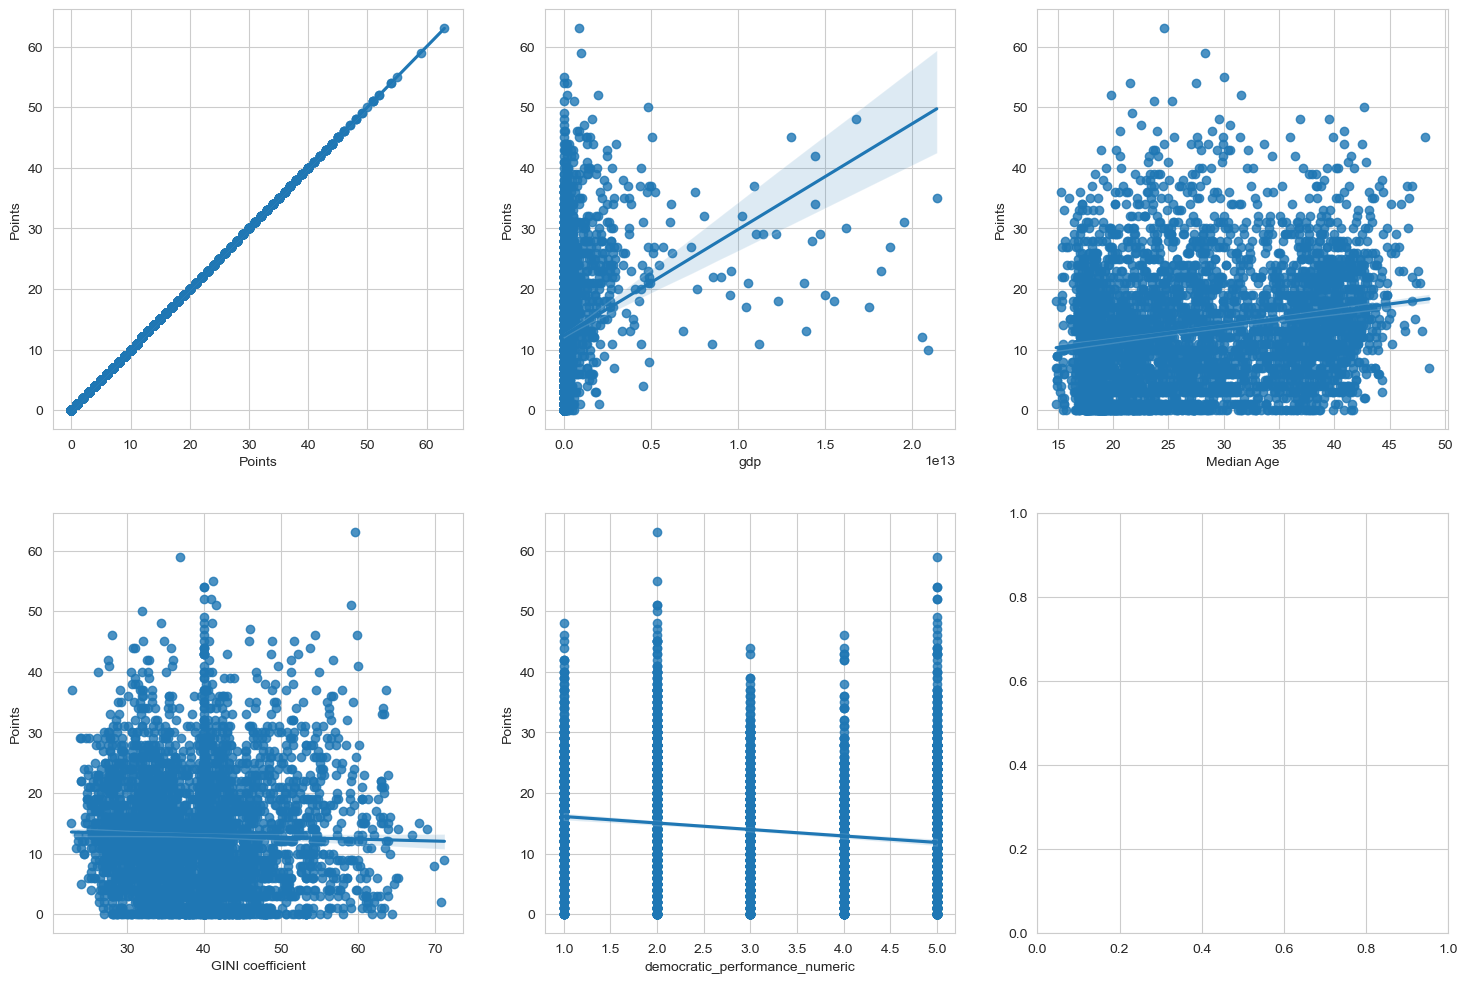

In [556]:
fig, ax = plt.subplots(round(len(golden_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list):
        sns.regplot(x=golden_features_list.index[i],y='Points', data=df_team_annual_final, ax=ax)

# Modeling

In [557]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

## Modeling using Points as performance indicator

In [558]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Drop 2020 data (will use for 2022 World Cup prediction later)
df_modeling = df_team_annual_final[df_team_annual_final['year'] != '2020']

#Extract variables we want to model and drop NA's
df_modeling = df_modeling[['Points','GINI coefficient','gdp','democratic_performance_numeric','Median Age']].dropna()

#Scale gdp data using logarithms
df_modeling['loggdp'] = np.log(df_modeling['gdp'])

#Scale points using logarithms
df_modeling['logPoints'] = np.log(df_modeling['Points'] + 1)


#Separate inputs and outputs
#Leave out median age (as per presentation)
X = df_modeling[['loggdp','democratic_performance_numeric', 'GINI coefficient']]

Y = df_modeling[['logPoints']]

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


#Scale training data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
y_train_norm = scaler.fit_transform(y_train)

#Scale test data using z-score normalization

#Scale X's
mu = X_train.mean()
std = X_train.std()

X_test_norm = X_test.copy()

for idx in [['loggdp', 'democratic_performance_numeric', 'GINI coefficient']]:
    X_test_norm[idx] = ((X_test[idx] - mu)/ std)

#Scale Y's
mu = y_train.mean()
std = y_train.std()

y_test_norm = y_test.copy()

for idx in [['logPoints']]:
    y_test_norm[idx] = ((y_test[idx] - mu)/ std)
    

(array([103.,   0.,   0., 103.,   0.,  52., 125., 127.,  82., 124., 238.,
        382., 274., 487., 368., 341., 234., 105.,  39.,   9.]),
 array([0.        , 0.20794415, 0.41588831, 0.62383246, 0.83177662,
        1.03972077, 1.24766493, 1.45560908, 1.66355323, 1.87149739,
        2.07944154, 2.2873857 , 2.49532985, 2.703274  , 2.91121816,
        3.11916231, 3.32710647, 3.53505062, 3.74299478, 3.95093893,
        4.15888308]),
 <BarContainer object of 20 artists>)

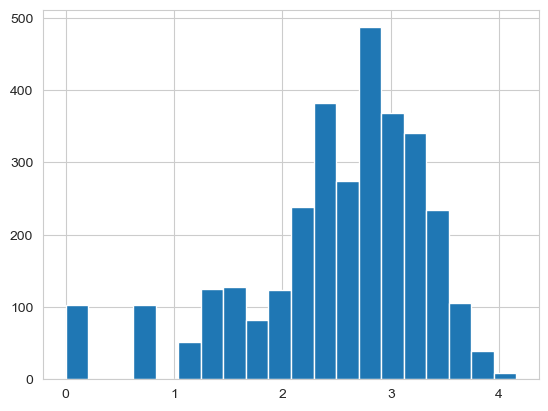

In [588]:
plt.hist(df_modeling['logPoints'], bins = 20)

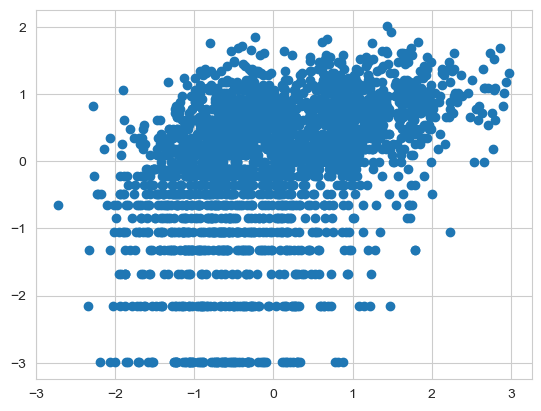

In [583]:
plt.scatter(X_train_norm[:,0], y_train_norm[:,0])

## Linear Regression

In [559]:
def average_error_rate(test, pred):
    diff = np.abs(test - pred)
    return np.divide(diff, test).mean()

In [560]:
model = LinearRegression()

model.fit(X_train_norm, y_train_norm)

y_pred_train_af = model.predict(X_train_norm)
y_pred_test_af = model.predict(X_test_norm)

error = mean_squared_error(y_test_norm, y_pred_test_af)

#MSE on test data
print('MSE for test data: ', error)
#R2 on test data
print('R2 for training data:', r2_score(y_train_norm, y_pred_train_af))
print('R2 for test data:', r2_score(y_test_norm, y_pred_test_af))

print('')

print("Training mean absolute error is: ", mean_absolute_error(y_train_norm, y_pred_train_af))
print("Test mean absolute error is: ", mean_absolute_error(y_test_norm, y_pred_test_af))
print()
print("Training mean error rate is: ", average_error_rate(y_train_norm, y_pred_train_af))
print("Test mean error rate is: ", average_error_rate(y_test_norm, y_pred_test_af))

print(model.coef_)

MSE for test data:  0.7543624796227163
R2 for training data: 0.18078506073889689
R2 for test data: 0.21788697947234004

Training mean absolute error is:  0.6774100414457883
Test mean absolute error is:  0.6457271353088986

Training mean error rate is:  -1.1792700303238481
Test mean error rate is:  logPoints   -1.198435
dtype: float64
[[0.4448257  0.0138881  0.08900355]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [561]:
#Print a regression table
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(y_train_norm, X_train_norm).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.180
Method:                 Least Squares   F-statistic:                              175.9
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                   4.87e-103
Time:                        18:32:36   Log-Likelihood:                         -3158.2
No. Observations:                2394   AIC:                                      6322.
Df Residuals:                    2391   BIC:                                      6340.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## KNN

In [ ]:
#Picking which K to use
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# creating list of K for KNN
k_list = list(range(1,300))

# creating list of cv scores
MSE_list = []

# perform MSE for each K value
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_norm ,y_train_norm)
    pred = knn.predict(X_test_norm)
    error = mean_squared_error(y_test_norm, pred)
    MSE_list.append(error)

<Figure size 640x480 with 0 Axes>

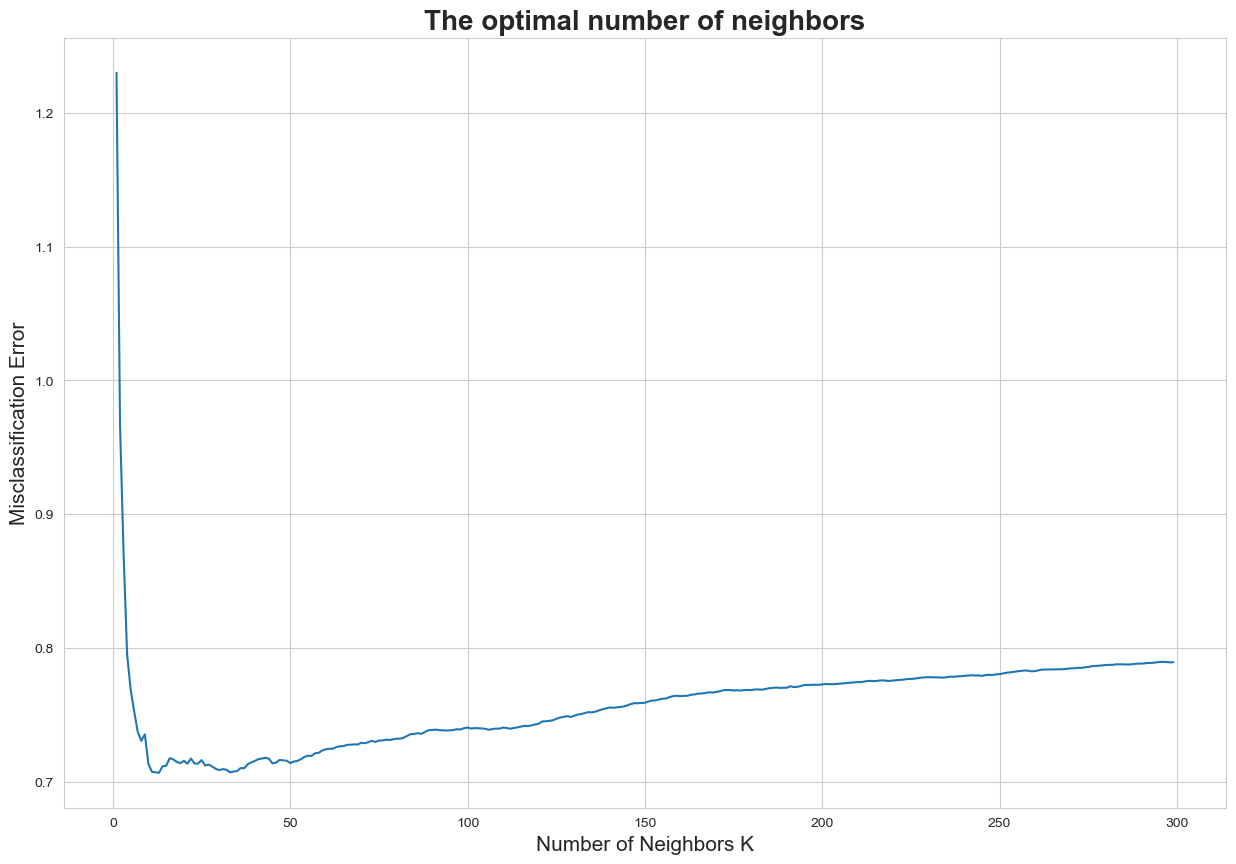

In [563]:
import seaborn as sns

#plot MSE per K value
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE_list)

plt.show()

In [564]:
best_k = k_list[MSE_list.index(min(MSE_list))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 13.


In [565]:
from sklearn.metrics import r2_score

#Evaluate model

#Create KNN using best k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_norm ,y_train_norm)
pred = knn.predict(X_test_norm)
error = mean_squared_error(y_test_norm, pred)

#MSE on test data
print('MSE for test data: ', error)
#R2 on test data
print('R2 for test data:', r2_score(y_test_norm, pred))

print()

#Mean aboslute error on test data
print("Test mean absolute error is: ", mean_absolute_error(y_test_norm, pred))
#Average error rate on test data
print("Test mean error rate is: ", average_error_rate(y_test_norm, pred))

MSE for test data:  0.7067482168363651
R2 for test data: 0.2672528160482205

Test mean absolute error is:  0.6189317688618093
Test mean error rate is:  logPoints   -1.892522
dtype: float64


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Tuning parameters

param_test_model = SVR()

parameters={
            #"kernel" : ("linear", "poly", "rbf", "sigmoid"),
            #'degree' : range(1,20),
            'C' : np.arange(0,100,5).tolist()}
        
tuning_model=GridSearchCV(param_test_model, parameters)

tuning_model.fit(X_train_norm,y_train_norm)

In [567]:
tuning_model.best_params_

{'C': 10}

In [590]:
#Support vector regression
#Create model using linear kernal and high C, given that
#we want to prevent outliers from shifting the boundary. 
svr = SVR(kernel="rbf", C = 10)
svr.fit(X_train_norm, y_train_norm)

#Predict values
pred = svr.predict(X_test_norm)

##Show model performance
#MSE on test data
print('MSE for test data: ', mean_squared_error(y_test_norm, pred))
#R2 on test data
print('R2 for test data:', r2_score(y_test_norm, pred))

print()

#Mean aboslute error on test data
print("Test mean absolute error is: ", mean_absolute_error(y_test_norm, pred))
#Average error rate on test data
#print("Test mean error rate is: ", average_error_rate(y_test_norm, pred))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for test data:  0.7444854053346347
R2 for test data: 0.22812739918315494

Test mean absolute error is:  0.614829332038356


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


## Decision Tree Regression

In [569]:
from sklearn.tree import DecisionTreeRegressor

#Tuning parameters

param_test_model = DecisionTreeRegressor()

parameters={#"max_depth" : range(1,30),
           #"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
        
tuning_model=GridSearchCV(param_test_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

tuning_model.fit(X_train_norm,y_train_norm)

tuning_model.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..............max_leaf_nodes=None;, score=-1.388 total time=   0.1s
[CV 2/3] END ..............max_leaf_nodes=None;, score=-1.411 total time=   0.0s
[CV 3/3] END ..............max_leaf_nodes=None;, score=-1.460 total time=   0.0s
[CV 1/3] END ................max_leaf_nodes=10;, score=-0.823 total time=   0.0s
[CV 2/3] END ................max_leaf_nodes=10;, score=-0.868 total time=   0.0s
[CV 3/3] END ................max_leaf_nodes=10;, score=-0.821 total time=   0.0s
[CV 1/3] END ................max_leaf_nodes=20;, score=-0.820 total time=   0.0s
[CV 2/3] END ................max_leaf_nodes=20;, score=-0.888 total time=   0.0s
[CV 3/3] END ................max_leaf_nodes=20;, score=-0.815 total time=   0.0s
[CV 1/3] END ................max_leaf_nodes=30;, score=-0.848 total time=   0.0s
[CV 2/3] END ................max_leaf_nodes=30;, score=-0.866 total time=   0.0s
[CV 3/3] END ................max_leaf_nodes=30;,

{'max_leaf_nodes': 10}

In [575]:
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf = 10, max_leaf_nodes = 10).fit(X_train_norm, y_train_norm)

pred = tree.predict(X_test_norm)

##Show model performance
#MSE on test data
print('MSE for test data: ', mean_squared_error(y_test_norm, pred))
#R2 on test data
print('R2 for test data:', r2_score(y_test_norm, pred))

#print()

#Mean aboslute error on test data
print("Test mean absolute error is: ", mean_absolute_error(y_test_norm, pred))
#Average error rate on test data
#print("Test mean error rate is: ", average_error_rate(y_test_norm, pred))

MSE for test data:  0.7677100837509446
R2 for test data: 0.2040483604217781
Test mean absolute error is:  0.6445830040563689


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


## Neural Network Regression

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


R2 for test data: 0.2656997300795061
Test mean absolute error is:  0.6212723900693884
Training set score: 0.250324
Test set score: 0.265700


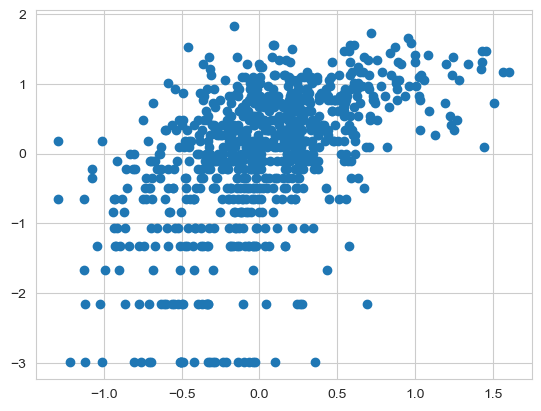

In [589]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=1, max_iter=1000).fit(X_train_norm, y_train_norm)

pred = model.predict(X_test_norm)

#R2 on test data
print('R2 for test data:', r2_score(y_test_norm, pred))

#print()

#Mean aboslute error on test data
print("Test mean absolute error is: ", mean_absolute_error(y_test_norm, pred))

plt.scatter(model.predict(X_test_norm),y_test_norm)

print("Training set score: %f" % model.score(X_train_norm, y_train_norm))
print("Test set score: %f" % model.score(X_test_norm, y_test_norm))

# Predicting 2022 World Cup Standings Using 2020 Data

In [595]:
from sklearn.compose import ColumnTransformer

df_2020 = df_team_annual_final[df_team_annual_final['year'] == '2020']

#Extract teams competing in the 2022 World Cup
teams_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales',
              'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia',
              'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia',
              'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

df_2020 = df_2020[df_2020['team'].isin(teams_2022)]

#Extract variables we want to model and drop NA's
df_2020 = df_2020[['team','GINI coefficient','gdp','democratic_performance_numeric']].dropna()

#Scale gdp data using logarithms
df_2020['loggdp'] = np.log(df_2020['gdp'])

#Normalize data

df_2020_num = df_2020[['loggdp', 'democratic_performance_numeric', 'GINI coefficient']]
df_2020_norm = scaler.fit_transform(df_2020_num)

#Predict Points using KNN regression (highest performing model)

pred = knn.predict(df_2020_norm)
pred = np.exp(pred)
pred = pd.DataFrame(pred)

#Get ordered list of top predicted teams
df_2020_predict = df_2020.reset_index().join(pred)
df_2020_predict.sort_values(by = [0])


,index,team,GINI coefficient,gdp,democratic_performance_numeric,loggdp,0
23,4569,Tunisia,35.8,3.923567e+10,2.0,24.392852,0.273478
19,3894,Senegal,40.3,2.491090e+10,3.0,23.938571,0.423940
6,1135,Croatia,31.1,5.596658e+10,2.0,24.748021,0.497059
4,857,Canada,31.1,1.643408e+12,2.0,28.127793,0.527064
20,3909,Serbia,34.1,5.296013e+10,4.0,24.692805,0.545415
8,1363,Ecuador,45.0,9.880801e+10,2.0,25.316445,0.576415
13,3070,Morocco,39.6,1.128706e+11,4.0,25.449508,0.589644
25,4776,Uruguay,39.7,5.362883e+10,1.0,24.705353,0.636651
0,195,Argentina,42.4,3.830670e+11,2.0,26.671476,0.654720
18,3838,Saudi Arabia,40.0,7.001179e+11,5.0,27.274515,0.804034
